In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, glob, stat, ast

from wordcloud import WordCloud, STOPWORDS
from IPython.display import HTML

import kaggle

ModuleNotFoundError: No module named 'wordcloud'

In [2]:
#kaggle.api.competition_download_files('tmdb-box-office-prediction')

In [3]:
Train = pd.read_csv(r'tmdb-box-office-prediction\train.csv')

In [4]:
def date_formatter(x):
    date = x.split('/')[1]
    month = x.split('/')[0]
    year = x.split('/')[2]
    
    if int(year)<=19:
        year = '20'+year
    else:
        year = '19'+year

    return pd.to_datetime('/'.join([month, date, year]), format="%m/%d/%Y")

In [5]:
Train = Train[['belongs_to_collection', 'budget', 'genres', 'original_language', 'original_title', 'overview',
       'popularity', 'production_companies', 'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'tagline', 'title', 'Keywords', 'cast', 'revenue']]

In [1]:
Train['genres'] = Train.genres.apply(lambda x: [i['name'] for i in ast.literal_eval(x)] if not(pd.isna(x)) else [])
Train['production_companies'] = Train.production_companies.apply(lambda x: [i['name'] for i in ast.literal_eval(x)] if not(pd.isna(x)) else [])
Train['production_countries'] = Train.production_countries.apply(lambda x: [i['iso_3166_1'] for i in ast.literal_eval(x)] if not(pd.isna(x)) else [])
Train['spoken_languages'] = Train.spoken_languages.apply(lambda x: [i['iso_639_1'] for i in ast.literal_eval(x)] if not(pd.isna(x)) else [])
Train['Keywords'] = Train.Keywords.apply(lambda x: [i['name'] for i in ast.literal_eval(x)] if not(pd.isna(x)) else [])
Train['belongs_to_collection'] = Train.belongs_to_collection.apply(lambda x: ast.literal_eval(x)[0]['name'] if not(pd.isna(x)) else x)

Train['release_date'] = Train.release_date.apply(date_formatter)
Train['year'] = Train.release_date.dt.year
Train['month'] = Train.release_date.dt.month

NameError: name 'Train' is not defined

In [7]:
Train.head().T

,0,1,2,3,4
belongs_to_collection,Hot Tub Time Machine Collection,The Princess Diaries Collection,NaN,NaN,NaN
budget,14000000,40000000,3300000,1200000,0
genres,[Comedy],"[Comedy, Drama, Family, Romance]",[Drama],"[Thriller, Drama]","[Action, Thriller]"
original_language,en,en,en,hi,ko
original_title,Hot Tub Time Machine 2,The Princess Diaries 2: Royal Engagement,Whiplash,Kahaani,마린보이
overview,"When Lou, who has become the ""father of the In...",Mia Thermopolis is now a college graduate and ...,"Under the direction of a ruthless instructor, ...",Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,Marine Boy is the story of a former national s...
popularity,6.575393,8.248895,64.29999,3.174936,1.14807
production_companies,"[Paramount Pictures, United Artists, Metro-Gol...",[Walt Disney Pictures],"[Bold Films, Blumhouse Productions, Right of W...",[],[]
production_countries,[US],[US],[US],[IN],[KR]
release_date,2015-02-20 00:00:00,2004-08-06 00:00:00,2014-10-10 00:00:00,2012-03-09 00:00:00,2009-02-05 00:00:00


In [8]:
li ={'START'}
for i in Train.genres:
    li = li.union(set(i))

li.remove('START')
    
for i in li:
    Train[i] = Train.genres.apply(lambda x : 1 if i in x else 0)

In [9]:
def label_encoder_language(x):
    if x == 'en':
        return 1
    if x == 'fr':
        return 2
    if x == 'ru':
        return 3
    if x == 'es':
        return 4
    if x == 'hi':
        return 5
    if x == 'ja':
        return 6
    else:
        return 0

In [10]:
Train['original_language'] = Train.original_language.apply(label_encoder_language)

In [11]:
li2 ={'START'}
for i in Train.Keywords:
    li2 = li2.union(set(i))

{'based': 1.0,
 'woman director': 0.6363636363636364,
 'independent film': 0.5636363636363636,
 'love': 0.5418181818181819,
 'death': 0.5163636363636364,
 'murder': 0.49454545454545457,
 'novel': 0.4036363636363636,
 'loss': 0.36363636363636365,
 'sex': 0.36,
 'violence': 0.3381818181818182,
 'police': 0.33454545454545453,
 'new york': 0.33454545454545453,
 'family': 0.33090909090909093,
 'duringcreditsstinger': 0.32727272727272727,
 'sport': 0.3090909090909091,
 'prison': 0.29818181818181816,
 'biography': 0.2690909090909091,
 'relationship': 0.26181818181818184,
 'drug': 0.26181818181818184,
 'musical': 0.26181818181818184,
 'friendship': 0.2545454545454545,
 'man': 0.2545454545454545,
 'high school': 0.2545454545454545,
 'car': 0.23636363636363636,
 'sequel': 0.22181818181818183,
 'child': 0.21454545454545454,
 'war': 0.21454545454545454,
 'suspense': 0.21454545454545454,
 'teenager': 0.21454545454545454,
 'alien': 0.21454545454545454,
 'friend': 0.2109090909090909,
 'revenge': 0.19

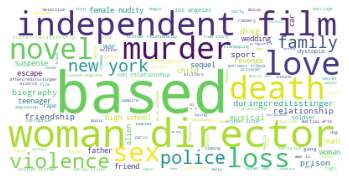

In [25]:
keyword = []
for i in Train.Keywords:
    if i is None or len(i) == 0:
        continue
    else:
        keyword.append(' '.join(i))

keyword = ' '.join(keyword)

wordcloud = WordCloud(background_color='white', stopwords=STOPWORDS).generate(keyword)

plt.imshow(wordcloud)
plt.axis('off')

wordcloud.words_

In [21]:
?wordcloud

Type:        WordCloud
String form: <wordcloud.wordcloud.WordCloud object at 0x000001FF559802E0>
File:        c:\users\40102956\anaconda3\lib\site-packages\wordcloud\wordcloud.py
Docstring:  
Word cloud object for generating and drawing.

Parameters
----------
font_path : string
    Font path to the font that will be used (OTF or TTF).
    Defaults to DroidSansMono path on a Linux machine. If you are on
    another OS or don't have this font, you need to adjust this path.

width : int (default=400)
    Width of the canvas.

height : int (default=200)
    Height of the canvas.

prefer_horizontal : float (default=0.90)
    The ratio of times to try horizontal fitting as opposed to vertical.
    If prefer_horizontal < 1, the algorithm will try rotating the word
    if it doesn't fit. (There is currently no built-in way to get only
    vertical words.)

mask : nd-array or None (default=None)
    If not None, gives a binary mask on where to draw words. If mask is not
    None, width and hei

In [13]:
WordCloud().generate(keyword)

In [ ]:
A.print()

In [ ]:
len(li)

In [ ]:
np.corrcoef(Train.revenue, Train.year)

In [ ]:
np.corrcoef(Train.revenue, Train.popularity)

In [ ]:
np.corrcoef(Train.revenue, Train.runtime.fillna(Train.runtime.mean()))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.base import clone

from sklearn.metrics import mean_squared_error, mean_squared_log_error

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold

import time


from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

In [ ]:
X = Train[['budget', 'popularity', 'runtime','original_language', 'year', 'month'] + list(li)].fillna({'runtime':Train.runtime.mean()})
Y = Train.revenue

In [ ]:
RFR = RandomForestRegressor(n_estimators=200,
                             max_depth=5,
                             min_samples_leaf=3,
                             n_jobs=-1,
                             max_features='log2',
                             random_state=5)


param_grid =   {'n_estimators': [50, 75, 100, 125, 150, 200],  
         'max_depth' : [3, 5, 7, 8, 10],
         'max_features' : ['log2', 'auto', 'sqrt'],
         'min_samples_split': [2,3,5],
         #'max_leaf_nodes': [3,5,7]
        }

A = GridSearchCV(RFR, param_grid , n_jobs= -1, cv=10).fit(X,Y)
print(A.best_score_)

RFR_Best =A.best_estimator_

In [ ]:
pd.DataFrame(zip(X.columns, RFR_Best.feature_importances_*100), columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)

In [ ]:
Train[li].sum().sort_values()

In [ ]:
RFR_Best.score(X,Y)

In [ ]:
np.sqrt(mean_squared_log_error(np.array(Y),RFR_Best.predict(X)))